# Лабораторная работа 4. Логические методы классификации
## <a href=" https://archive.ics.uci.edu/dataset/850/raisin">Изюм</a>

### Описание набора данных:
Изображения сортов изюма Кечимен и Бесни были получены с помощью CVS. Всего было использовано 900 видов изюма, в том числе 450 из обоих сортов, и было выделено 7 морфологических признаков.

### Прилагающаяся информация:
Изображения сортов изюма Кечимен и Бесни, выращенных в Турции, были получены с помощью CVS. Всего было использовано 900 зерен изюма, в том числе 450 кусочков из обоих сортов. Эти изображения были подвергнуты различным этапам предварительной обработки и были выделены 7 морфологических признаков. Эти функции были классифицированы с использованием трех различных методов.

### Назначение набора данных и возможные модели:
1) Area - <b>Целое</b> - Задает количество пикселей в пределах границ выступа
2) MajorAxisLength - <b>Дробное</b> - Измеряет размер изображения путем вычисления расстояния между границами выступа и пикселями вокруг него
3) MinorAxisLength - <b>Дробное</b> - Задает длину главной оси, которая является самой длинной линией, которую можно провести на выступе
4) EccentricityConvexArea - <b>Дробное</b> - Задает длину малой оси, которая является кратчайшей линией, которую можно провести на возвышении
5) ConvexArea - <b>Целое</b> - определяет эксцентриситет эллипса
6) Extent - <b>Дробное</b> - Задает количество пикселей наименьшей выпуклой оболочки области, образованной изюминкой
7) Perimeter - <b>Дробное</b> - Показывает отношение площади области, образованной изюминкой, к общему количеству пикселей в ограничивающей рамке
8) Class - <b>Категориальное</b> - вид изюма (Кецимен или Бесни)


Чтение набора данных и подключение библиотек 

In [14]:
import numpy as np
import pandas as pd

%matplotlib inline

from matplotlib import pyplot as plt

data_source = 'Raisin_Dataset.xlsx'

d = pd.read_excel(data_source,
                  header=None,
                  names=['Area','MajorAxisLength','MinorAxisLength','Eccentricity',
                         'ConvexArea','Extent','Perimeter', 'Class'])

dX = d.iloc[ : ,[1,2,0,4] ]
dy = d['Class']

print(dX.head())
print(dy.head())

   MajorAxisLength  MinorAxisLength   Area  ConvexArea
0       442.246011       253.291155  87524       90546
1       406.690687       243.032436  75166       78789
2       442.267048       266.328318  90856       93717
3       286.540559       208.760042  45928       47336
4       352.190770       290.827533  79408       81463
0    Kecimen
1    Kecimen
2    Kecimen
3    Kecimen
4    Kecimen
Name: Class, dtype: object


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Разделение данных на обучающий и тестовый наборы
X_train, X_holdout, y_train, y_holdout = \
train_test_split(dX, dy, test_size=0.3, random_state=12)

# Инициализация и обучение модели дерева решений
tree = DecisionTreeClassifier(max_depth=5, # максимальная глубина дерева
                              random_state=21, # устанавливает начальное значение для генератора случайных чисел, обеспечивая воспроизводимость результатов
                              max_features=2) # максимальное количество признаков, рассматриваемых при принятии каждого разделения
tree.fit(X_train, y_train)

# Получение прогнозов на тестовом наборе и вычисление точности
tree_pred = tree.predict(X_holdout)
accur = accuracy_score(y_holdout, tree_pred)

print(accur)

0.8185185185185185


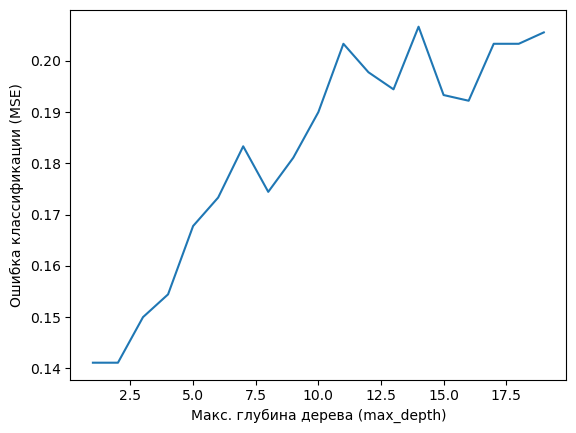

Оптимальные значения max_depth:  [1, 2]


In [20]:
from sklearn.model_selection import cross_val_score


# Значения параметра max_depth
d_list = list(range(1,20))

# Пустой список для хранения значений точности
cv_scores = []


# В цикле проходим все значения K
for d in d_list:
    tree = DecisionTreeClassifier(max_depth=d,
                                  random_state=10,
                                  max_features=2)
    scores = cross_val_score(tree, dX, dy, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


# Вычисляем ошибку (misclassification error)
MSE = [1-x for x in cv_scores]

# Строим график
plt.plot(d_list, MSE)
plt.xlabel('Макс. глубина дерева (max_depth)')
plt.ylabel('Ошибка классификации (MSE)')

plt.show()

# Получение минимума
d_min = min(MSE)

# Находим прочие минимумы при их наличии
all_d_min = []


for i in range(len(MSE)):
    if MSE[i] <= d_min:
        all_d_min.append(d_list[i])


# печатаем все K, оптимальные для модели
print('Оптимальные значения max_depth: ', all_d_min)

In [25]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import tree

# Создание модели дерева решений с заданными параметрами
dtc = DecisionTreeClassifier(max_depth=10, random_state=21, max_features=2)  

# Задание диапазона параметров для поиска оптимальных значений
tree_params = { 'max_depth': range(1,20), 'max_features': range(1,4) }  

# Инициализация объекта для поиска оптимальных параметров с использованием кросс-валидации
tree_grid = GridSearchCV(dtc, tree_params, cv=10, verbose=True, n_jobs=-1)

# Поиск оптимальных параметров модели с использованием указанных данных
tree_grid.fit(dX, dy)

print('\n')
print('Лучшее сочетание параметров: ', tree_grid.best_params_)
print('Лучшие баллы cross validation: ', tree_grid.best_score_)

#  Генерируем графическое представление лучшего дерева (сохранится в файле)
unique_class_names = [str(cls) for cls in dy.unique()]
tree.export_graphviz(tree_grid.best_estimator_,
                     feature_names=dX.columns,
                     class_names=unique_class_names,
                     out_file='raisin.dot',
                     filled=True, rounded=True)

Fitting 10 folds for each of 57 candidates, totalling 570 fits


Лучшее сочетание параметров:  {'max_depth': 1, 'max_features': 2}
Лучшие баллы cross validation:  0.8588888888888888


In [26]:
# Применение полученных параметров
dtc = DecisionTreeClassifier(max_depth=1,
                             random_state=10,
                             max_features=2)

# Обучаем модель
dtc.fit(dX.values, dy)

# Получаем предсказание на основе модели
res = dtc.predict([[323, 200, 50000, 52000]])

print(res)

['Kecimen']


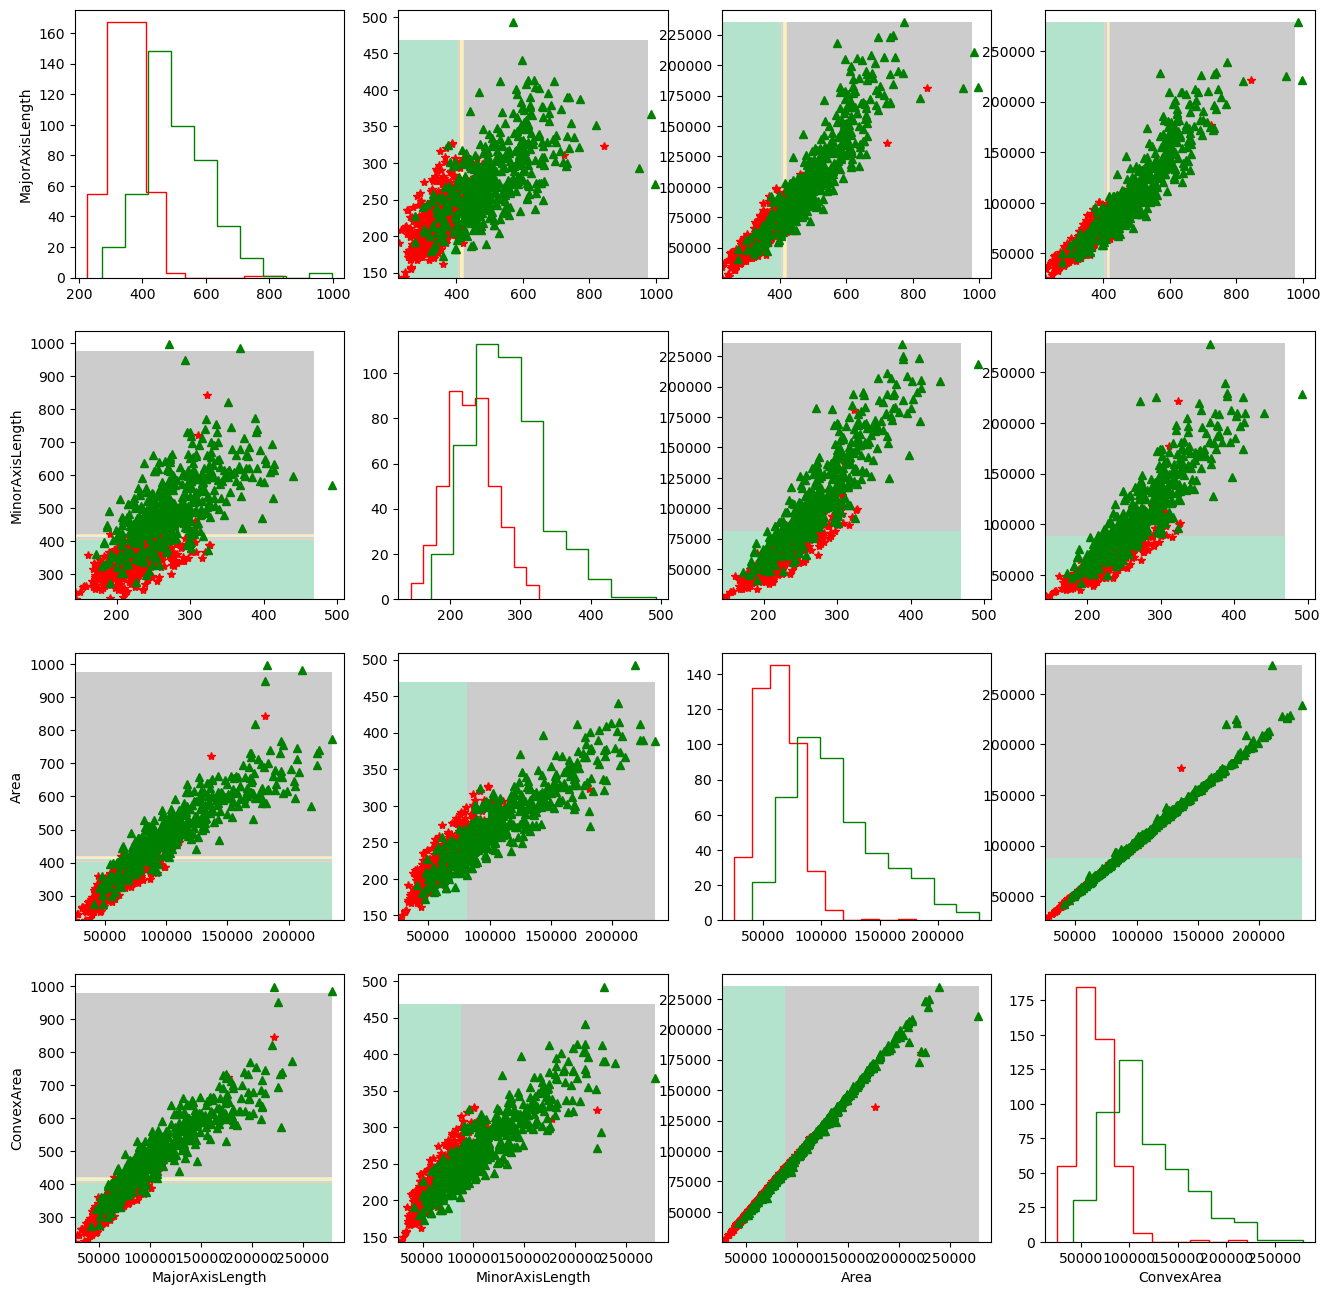

In [31]:
# Определение маркеров для различных классов
plot_markers = ['r*', 'g^']

answers = dy.unique()
labels = dX.columns.values

# Создаем подграфики для каждой пары признаков
f, places = plt.subplots(4, 4, figsize=(16,16))

fmin = dX.min().values-0.5  # Минимальные значения признаков
fmax = dX.max().values+0.5  # Максимальные значения признаков
plot_step = 25  # Шаг для построения решающих границ

# Обходим все subplot
for i in range(0,4):
    for j in range(0,4):
        # Строим решающие границы
        if not i == j:  # Проверка, что индексы признаков не совпадают
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step, dtype=float),  # Создание сетки значений для оси x
                            np.arange(fmin[j], fmax[j], plot_step, dtype=float))  # Создание сетки значений для оси y
            model = DecisionTreeClassifier(max_depth=1, random_state=10, max_features=2)  # Инициализация модели дерева решений
            model.fit(dX.iloc[:, [i, j]].values, dy.values)  # Обучение модели на выбранных признаках
            p = model.predict(np.c_[xx.ravel(), yy.ravel()])  # Предсказание классов для каждой точки на сетке
            p = p.reshape(xx.shape)  # Изменение формы предсказанных значений
            p[p == answers[0]] = 0  # Замена значений классов на числовые
            p[p == answers[1]] = 1
            p = p.astype('int32')  # Приведение типа данных
            places[i, j].contourf(xx, yy, p, cmap=plt.cm.Pastel2)  # Заполнение контуров для решающих границ

        # Обход всех классов (Вывод обучающей выборки)
        for id_answer in range(len(answers)):
            idx = np.where(dy == answers[id_answer])
            # Вывод гистограммы
            if i == j:
                places[i, j].hist(dX.iloc[idx].iloc[:,i],
                                  color=plot_markers[id_answer][0],
                                 histtype = 'step')
            # Вывод диаграмма
            else:
                places[i, j].plot(dX.iloc[idx].iloc[:,i], dX.iloc[idx].iloc[:,j],
                                  plot_markers[id_answer],
                                  label=answers[id_answer], markersize=6)

        # Печать названия осей
        if j == 0:
          places[i, j].set_ylabel(labels[i])

        if i == 3:
          places[i, j].set_xlabel(labels[j])

plt.savefig('decision_tree_plot.png')
